<a href="https://colab.research.google.com/github/KhannchanBalanarasimhan/Machine_learning/blob/main/Vaccine_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vaccine Prediction Using Logistic Regression - Khannchan


<b>Abstract:</b>
Subjects receiving the same vaccine often show different levels of immune responses 
and some may even present adverse side effects to the vaccine. Systems vaccinology can 
combine omics data and machine learning techniques to obtain highly predictive 
signatures of vaccine immunogenicity and reactogenicity. Currently, several machine 
learning methods are already available to researchers with no background in 
bioinformatics.


</n>
<b>Problem Statement:</b>
Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic 
Regression
</n>

<b>Importing the necessary Libraries</b>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Importing the Dataset 

In [ ]:

data = pd.read_csv("vac_log_reg.csv")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vac_log_reg.csv to vac_log_reg.csv


In [ ]:
data.head()


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
data.shape

(26707, 34)

The dataset has 34 coloumns and 26707 records 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

# Checking for null values 

In [ ]:
data.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

Dropping the Records which is irrelavant and has a large number of missing values 

In [ ]:
new = data.drop(columns=["race","sex","marital_status","housing_status","census_msa","no_of_adults","no_of_children","income_level","employment","qualification","unique_id","h1n1_vaccine"])

In [ ]:
new.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [ ]:
# segregating the h1n1 vaccine that is an dependent variable

y_dep = data["h1n1_vaccine"]

In [ ]:
y_dep.head()

0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64

In [ ]:
new.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years


In [ ]:
# filling missing values and coverting it all to categorical variables 

In [ ]:
for i in new.columns:
                new[i]=new[i].fillna(value=new[i].mode()[0])

In [ ]:
new.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
dtype: int64

In [ ]:
new.head() 

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years


In [ ]:
# our null values have been fixed 

# EDA

In [ ]:
new.shape

                        
                

(26707, 22)

In [ ]:
# since the age bracket is an ordinal variable we label encode it 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
new["age_bracket"]= le.fit_transform(new["age_bracket"])

In [ ]:
new["age_bracket"]

0        3
1        1
2        0
3        4
4        2
        ..
26702    4
26703    0
26704    3
26705    0
26706    4
Name: age_bracket, Length: 26707, dtype: int64

In [ ]:
# bar plot 
for i in new.columns:
    new[i]=new[i].astype("category")


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   h1n1_worry                 26707 non-null  category
 1   h1n1_awareness             26707 non-null  category
 2   antiviral_medication       26707 non-null  category
 3   contact_avoidance          26707 non-null  category
 4   bought_face_mask           26707 non-null  category
 5   wash_hands_frequently      26707 non-null  category
 6   avoid_large_gatherings     26707 non-null  category
 7   reduced_outside_home_cont  26707 non-null  category
 8   avoid_touch_face           26707 non-null  category
 9   dr_recc_h1n1_vacc          26707 non-null  category
 10  dr_recc_seasonal_vacc      26707 non-null  category
 11  chronic_medic_condition    26707 non-null  category
 12  cont_child_undr_6_mnths    26707 non-null  category
 13  is_health_worker           2670

<Figure size 432x288 with 0 Axes>

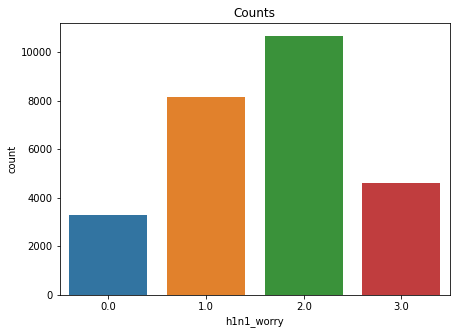

<Figure size 432x288 with 0 Axes>

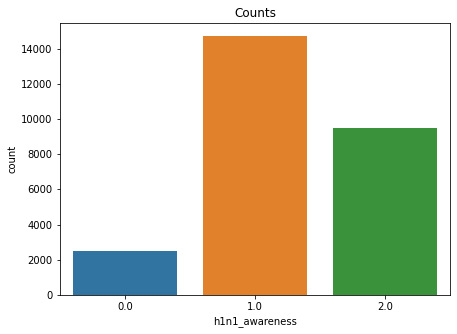

<Figure size 432x288 with 0 Axes>

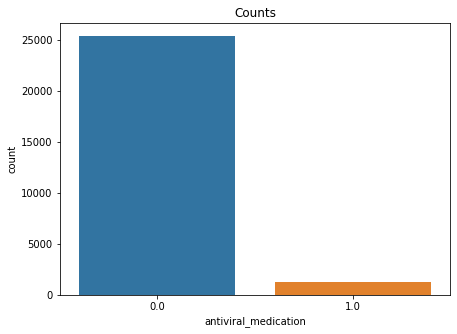

<Figure size 432x288 with 0 Axes>

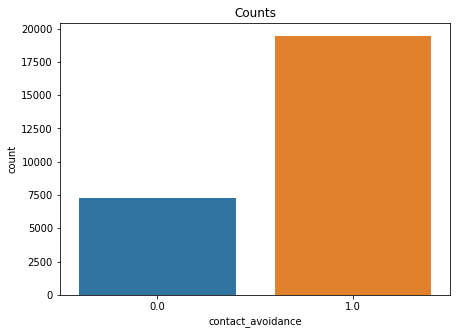

<Figure size 432x288 with 0 Axes>

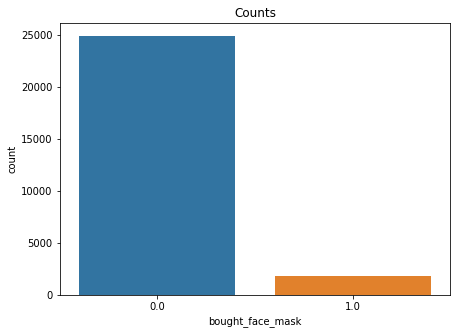

<Figure size 432x288 with 0 Axes>

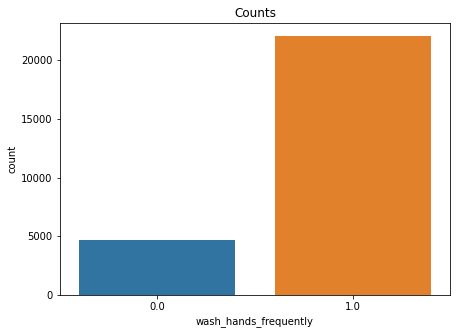

<Figure size 432x288 with 0 Axes>

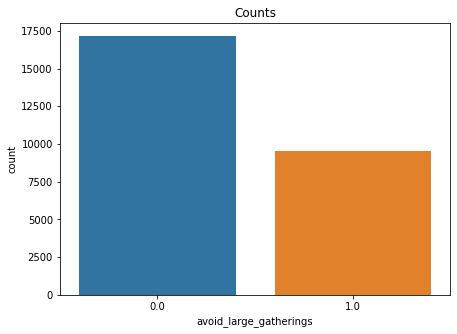

<Figure size 432x288 with 0 Axes>

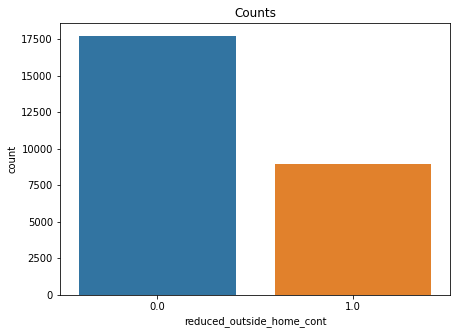

<Figure size 432x288 with 0 Axes>

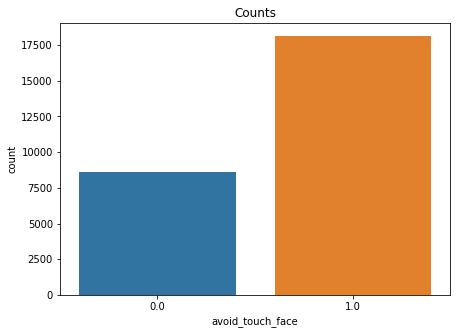

<Figure size 432x288 with 0 Axes>

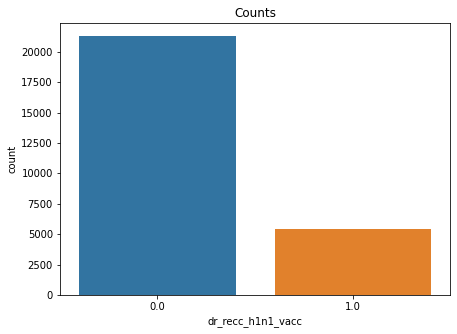

<Figure size 432x288 with 0 Axes>

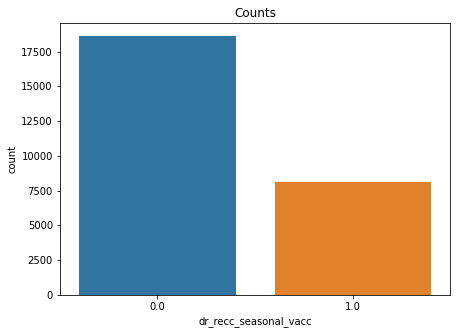

<Figure size 432x288 with 0 Axes>

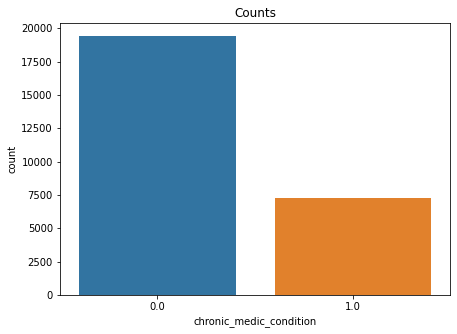

<Figure size 432x288 with 0 Axes>

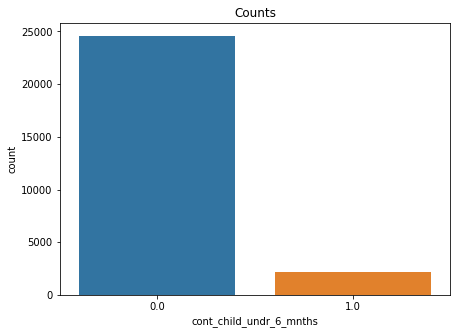

<Figure size 432x288 with 0 Axes>

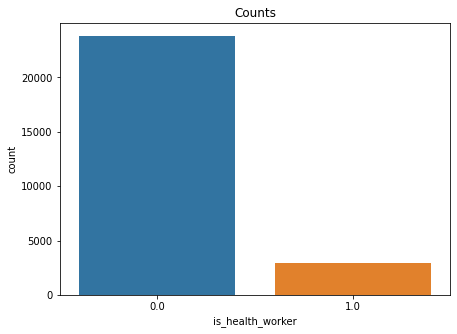

<Figure size 432x288 with 0 Axes>

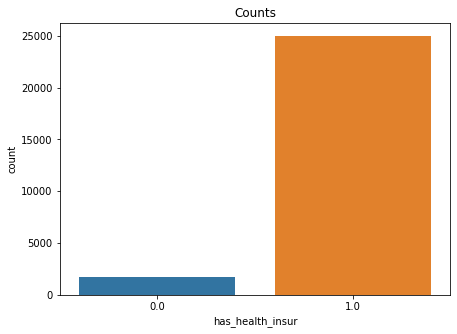

<Figure size 432x288 with 0 Axes>

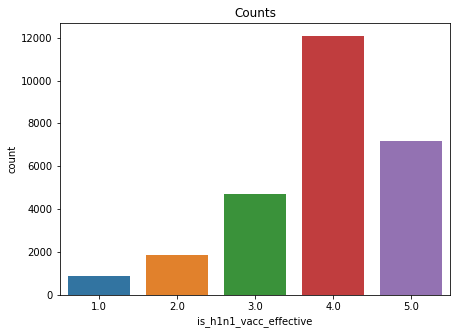

<Figure size 432x288 with 0 Axes>

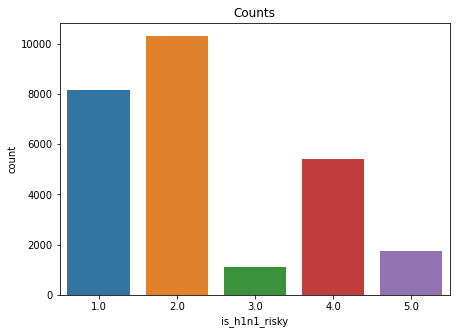

<Figure size 432x288 with 0 Axes>

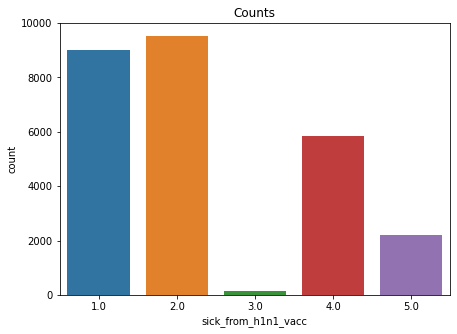

<Figure size 432x288 with 0 Axes>

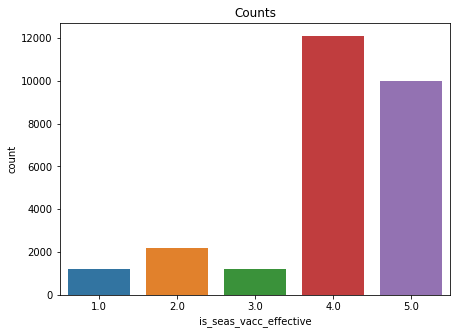

<Figure size 432x288 with 0 Axes>

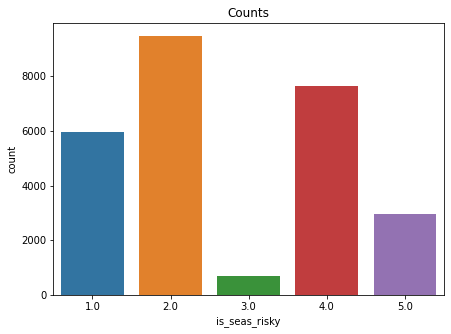

<Figure size 432x288 with 0 Axes>

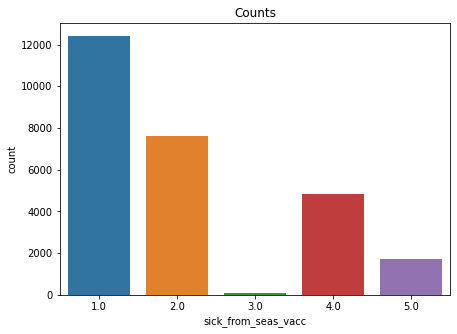

<Figure size 432x288 with 0 Axes>

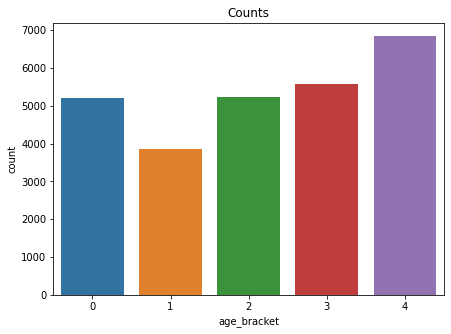

In [ ]:

for i in new.columns:
        plt.suptitle("Max_no in each observation")
        plt.figure(figsize=(7,5))
        plt.title("Counts")
        sns.countplot(x=new[i])
        plt.show()
        

Observations made <br/>
1. The majority of the worry regarding H1n1 are somewhat worried<br/>
2. The majority of them are somewhat aware<br/>
3. Most of them have not taken the antiviral medication <br/>
4. Most of the people avoid contact<br/>
5. Many have not got face masks <br/>
6. Interestingly they do wash their hands<br/>
7. Most of them avid crowd and do stay at home <br/>
8. Many of them dont actually touch their faces<br/>
9. Not many have beeen recommended with H1n1 vaccine and seasonal vaccine<br/>
10. Most of them are health workers and have contact with the children<br/>
11. For many of them they have been health insurance <br/>
12. For many the vaccine has proven to be mostly effective<br/>
13. They find the seasonal vaccine risky <br/>
14. They do fall under the 64+ category 

#  Feature  Importance Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
rf = RandomForestClassifier(n_estimators=50)

In [ ]:
temp = pd.concat([new,y_dep],axis=1)

In [ ]:
temp.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,2,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(new,y_dep,random_state=42,test_size=0.3)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
rf.feature_importances_

array([0.06434242, 0.04571863, 0.01233209, 0.02759678, 0.01482144,
       0.01875431, 0.02827837, 0.02812978, 0.03065642, 0.11509161,
       0.02771664, 0.03108724, 0.01707427, 0.02693852, 0.01064617,
       0.07714108, 0.08715029, 0.06493843, 0.05032442, 0.06988751,
       0.06071151, 0.09066208])

<BarContainer object of 22 artists>

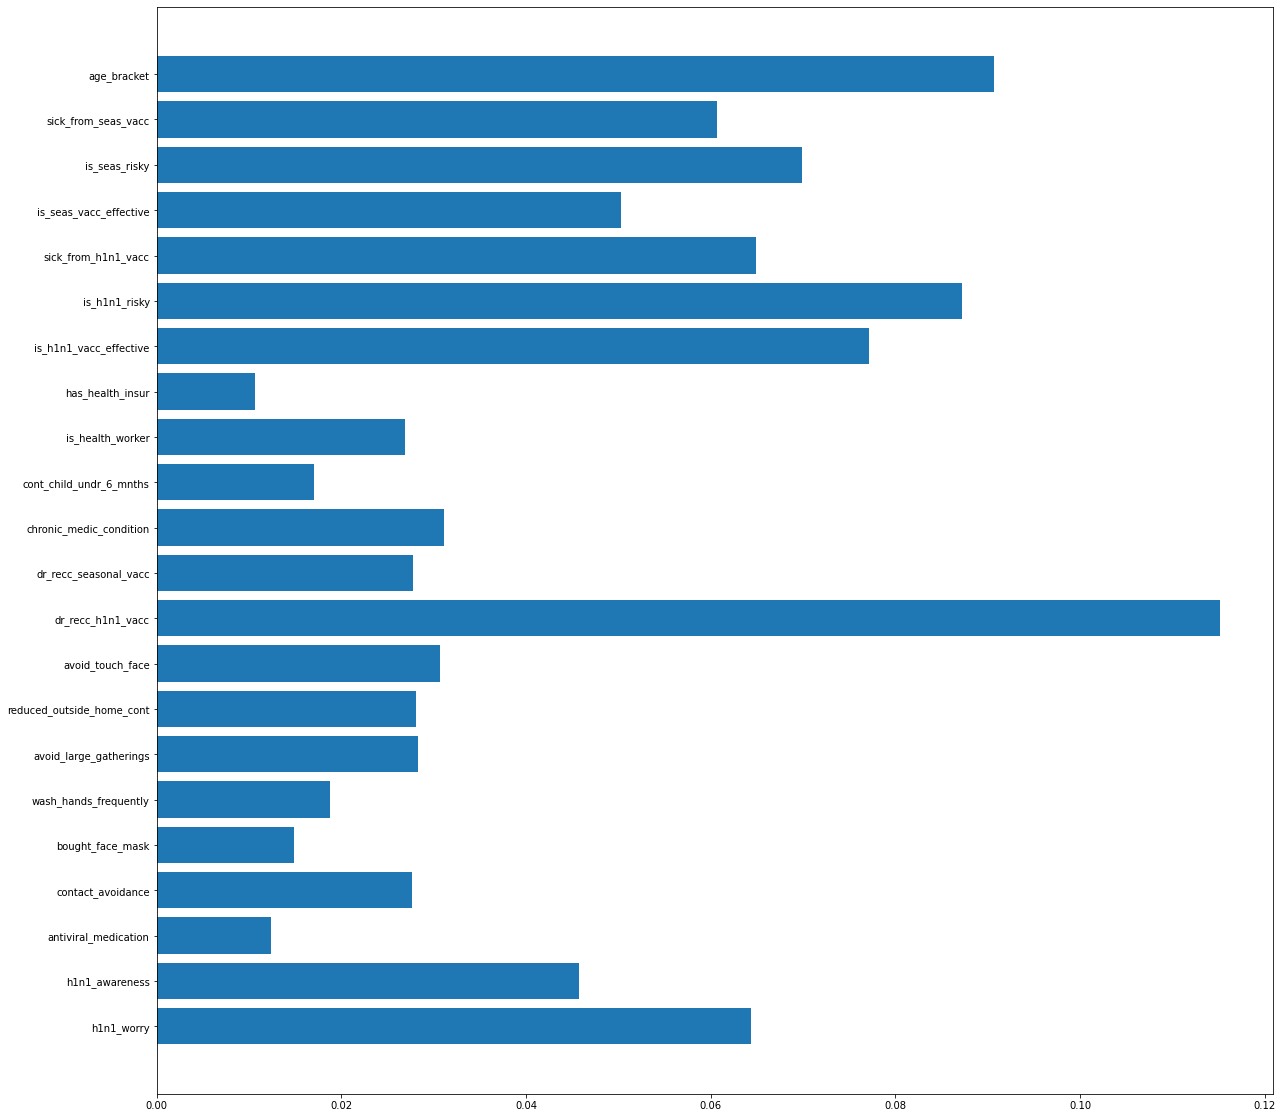

In [ ]:
plt.figure(figsize=[20,20])
plt.barh(new.columns, rf.feature_importances_)

# The Doctor's recommendation of the H1N1 has more importance followed by the age bracket, H1n1 worry and risk and effectiveness component of the vaccine

Check for the Multicollinearity has to be done 

In [ ]:
num_conv = new.copy()



In [ ]:
for i in num_conv.columns:
    num_conv[i]=num_conv[i].astype("int")

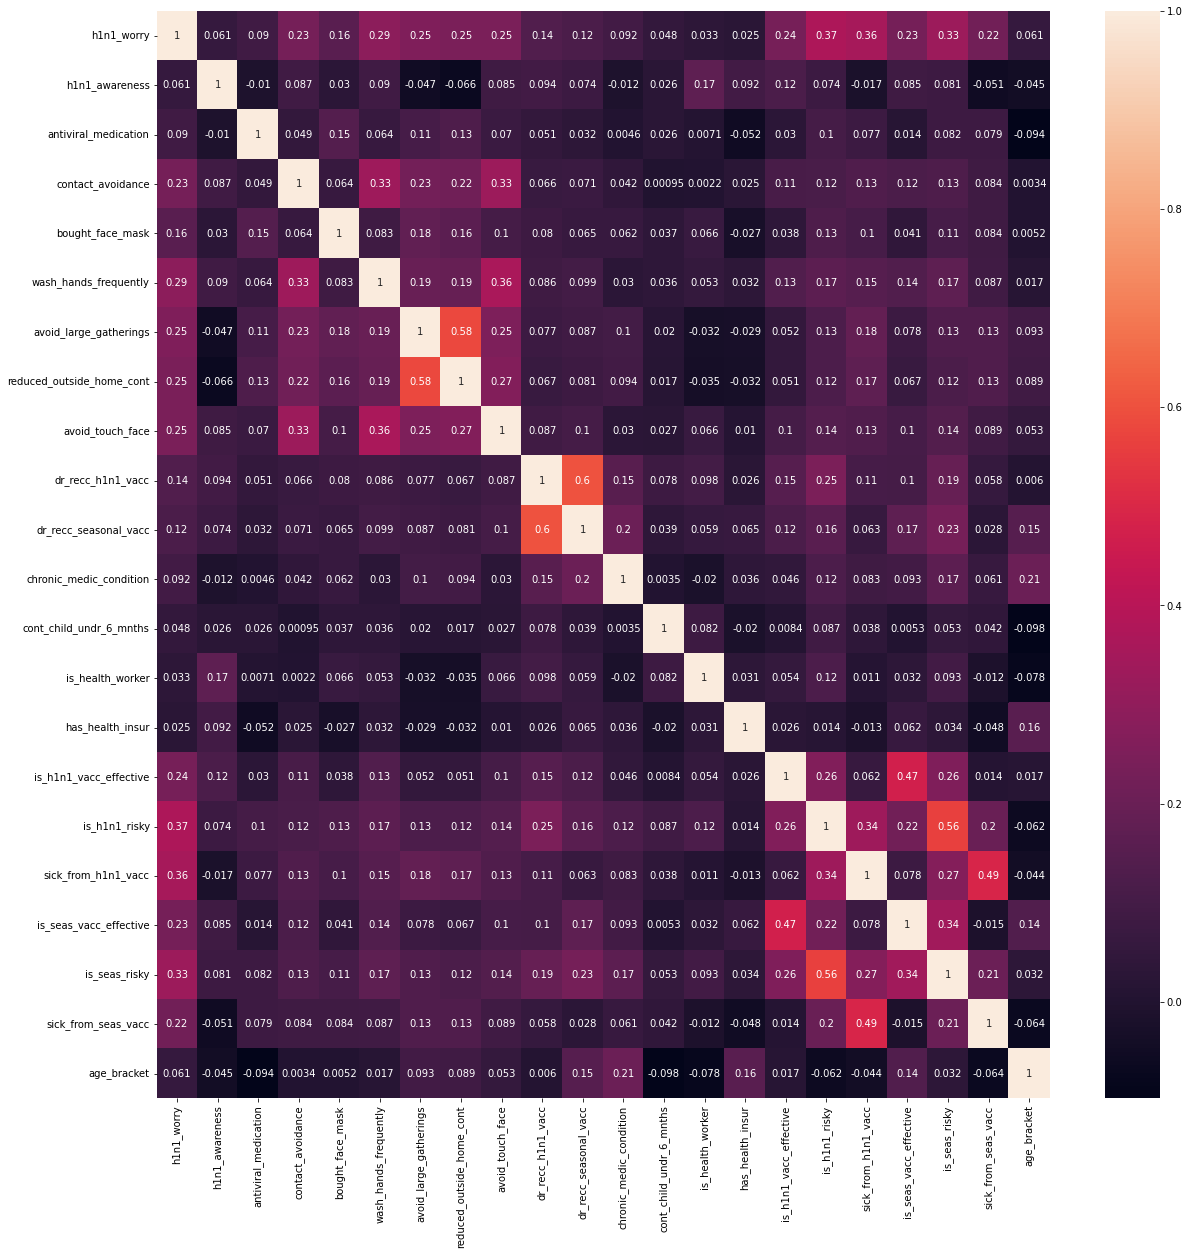

In [ ]:
plt.figure(figsize=[20,20])
sns.heatmap(num_conv.corr(),annot=True);

In [ ]:
# scaling the data 
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [ ]:
num_conv = mm.fit_transform(num_conv)

# Reduce the number of components to Reduce Overfitting Problem

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=4)

In [ ]:
x_pca = pca.fit_transform(num_conv)

In [ ]:
print(pca.explained_variance_ratio_)

[0.19595276 0.1123418  0.08459076 0.07113326]


In [ ]:
x_pca_1 = pd.DataFrame(data = x_pca, columns = ['pca1', 'pca2','pca3','pca4'])

In [ ]:
x_pca_1 = x_pca_1.drop(columns=["pca3","pca4"])

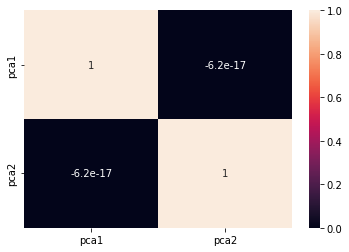

In [ ]:
sns.heatmap(x_pca_1.corr(),annot=True)

We have reduced the problem of multicollinearity by using PCA

# Model Selection Logistic Regression
|

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(penalty='l2',solver="sag",C=5)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_1,y_dep,train_size=0.3,random_state=42)

In [ ]:
y_train.value_counts()

0    6341
1    1671
Name: h1n1_vaccine, dtype: int64

The given data is an imbalanced data 

We use SMOTE for an Imbalanced DataSet 

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE



In [ ]:
sm = SMOTE()

In [ ]:
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [ ]:
y_train_sm.value_counts()

1    6341
0    6341
Name: h1n1_vaccine, dtype: int64

In [ ]:
x_train

,pca1,pca2
15332,1.150664,-0.089726
7329,0.949112,-0.867346
10200,1.162103,-0.423051
3895,0.510343,0.077600
24039,-0.589431,0.695220
...,...,...
21575,-0.598381,-0.130401
5390,-0.619008,-0.144968
860,-0.509856,-0.218081
15795,0.273357,0.894126


**Fitting the Logistic Regression **

In [ ]:
log.fit(x_train_sm,y_train_sm)

LogisticRegression(C=5, solver='sag')

In [ ]:
y_train_pred = log.predict(x_train)

In [ ]:
y_train_pred

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[4633, 1708],
       [ 680,  991]])

In [ ]:
# classification report for the train data 
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80      6341
           1       0.37      0.59      0.45      1671

    accuracy                           0.70      8012
   macro avg       0.62      0.66      0.62      8012
weighted avg       0.77      0.70      0.72      8012



In [ ]:
y_test_pred = log.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[10848,  3844],
       [ 1651,  2352]])

In [ ]:
# classification report for test data 
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80     14692
           1       0.38      0.59      0.46      4003

    accuracy                           0.71     18695
   macro avg       0.62      0.66      0.63     18695
weighted avg       0.76      0.71      0.73     18695



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# accuracy_score for train data 

In [ ]:
acc_train = accuracy_score(y_train,y_train_pred)
acc_train

0.7019470793809286

In [ ]:
acc_test = accuracy_score(y_test,y_test_pred)
acc_test

0.7060711420165819

Logisitic regression doesnt seem to be an ideal model so we need to try with other models like naive bayes,SVM,KNN, Decisiontree and Random Forest 